<a href="https://colab.research.google.com/github/milanpavikevik/GenreClassifier/blob/master/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [58]:
#Fast Fourier Transform
import scipy
def fft_plot(audio,sampling_rate,label):
  n = len(audio)
  T = 1/sampling_rate
  yf=scipy.fft(audio)
  xf=np.linspace(0,1.0/(2.0*T),int(n/2))
  fig,ax = plt.subplots()
  ax.plot(xf,2.0/n* np.abs(yf[:n//2]))
  plt.grid()
  plt.xlabel('Frequency ------->')
  plt.ylabel('Magnitude')
  plt.title(label)
  plt.show()


#Extract MFCC from spectogram
def extract_features(audio_path,offset):

    y, sr = librosa.load(audio_path, offset=offset, duration=4.5)

    
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, 
                                   hop_length=512, 
                                   n_mels=128)
    
    
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)

    vector = np.append(mfccs,spec_cent,axis=0)
    vector = np.append(vector,spec_bw,axis=0)
    vector = np.append(vector,rolloff,axis=0)
    vector = np.append(vector,zcr,axis=0)
    vector = np.append(vector,chroma_stft,axis=0)


    return vector

In [ ]:
!pip install youtube_dl

In [ ]:
import youtube_dl
import time
import random

rock=['https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=BB0DU4DoPP4', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=ScNNfyq3d_w', 'https://www.youtube.com/watch?v=Gd9OhYroLN0', 'https://www.youtube.com/watch?v=YVkUvmDQ3HY', 'https://www.youtube.com/watch?v=gOMhN-hfMtY', 'https://www.youtube.com/watch?v=fV4DiAyExN0', 'https://www.youtube.com/watch?v=_sXrTpOVnak', 'https://www.youtube.com/watch?v=zsCD5XCu6CM', 'https://www.youtube.com/watch?v=tAGnKpE4NCI', 'https://www.youtube.com/watch?v=3YxaaGgTQYM', 'https://www.youtube.com/watch?v=hTWKbfoikeg', 'https://www.youtube.com/watch?v=v2H4l9RpkwM', 'https://www.youtube.com/watch?v=5anLPw0Efmo', 'https://www.youtube.com/watch?v=uelHwf8o7_U', 'https://www.youtube.com/watch?v=vjVkXlxsO8Q', 'https://www.youtube.com/watch?v=vx2u5uUu3DE', 'https://www.youtube.com/watch?v=8sgycukafqQ', 'https://www.youtube.com/watch?v=Soa3gO7tL-c', 'https://www.youtube.com/watch?v=UprcpdwuwCg', 'https://www.youtube.com/watch?v=yZIummTz9mM', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=3YxaaGgTQYM', 'https://www.youtube.com/watch?v=YlUKcNNmywk', 'https://www.youtube.com/watch?v=7QU1nvuxaMA', 'https://www.youtube.com/watch?v=fV4DiAyExN0', 'https://www.youtube.com/watch?v=kPBzTxZQG5Q', 'https://www.youtube.com/watch?v=yKNxeF4KMsY', 'https://www.youtube.com/watch?v=1cQh1ccqu8M', 'https://www.youtube.com/watch?v=8sgycukafqQ', 'https://www.youtube.com/watch?v=Soa3gO7tL-c', 'https://www.youtube.com/watch?v=SBjQ9tuuTJQ', 'https://www.youtube.com/watch?v=HyHNuVaZJ-k', 'https://www.youtube.com/watch?v=iAP9AF6DCu4', 'https://www.youtube.com/watch?v=k4V3Mo61fJM', 'https://www.youtube.com/watch?v=gGdGFtwCNBE', 'https://www.youtube.com/watch?v=98Akpf1ph2o', 'https://www.youtube.com/watch?v=RF0HhrwIwp0', 'https://www.youtube.com/watch?v=RvnkAtWcKYg', 'https://www.youtube.com/watch?v=vc6vs-l5dkc', 'https://www.youtube.com/watch?v=0J2QdDbelmY', 'https://www.youtube.com/watch?v=xPU8OAjjS4k', 'https://www.youtube.com/watch?v=r00ikilDxW4', 'https://www.youtube.com/watch?v=d8ekz_CSBVg', 'https://www.youtube.com/watch?v=Oextk-If8HQ', 'https://www.youtube.com/watch?v=s1tAYmMjLdY', 'https://www.youtube.com/watch?v=9Ht5RZpzPqw', 'https://www.youtube.com/watch?v=Sb5aq5HcS1A', 'https://www.youtube.com/watch?v=hPC2Fp7IT7o', 'https://www.youtube.com/watch?v=GemKqzILV4w', 'https://www.youtube.com/watch?v=v2H4l9RpkwM', 'https://www.youtube.com/watch?v=8DyziWtkfBw', 'https://www.youtube.com/watch?v=8mGBaXPlri8', 'https://www.youtube.com/watch?v=RiSfTyrvJlg', 'https://www.youtube.com/watch?v=gnIZ7RMuLpU', 'https://www.youtube.com/watch?v=cjVQ36NhbMk', 'https://www.youtube.com/watch?v=lL2ZwXj1tXM', 'https://www.youtube.com/watch?v=CDl9ZMfj6aE', 'https://www.youtube.com/watch?v=BB0DU4DoPP4', 'https://www.youtube.com/watch?v=s8QYxmpuyxg', 'https://www.youtube.com/watch?v=h_L4Rixya64', 'https://www.youtube.com/watch?v=0k_1kvDh2UA', 'https://www.youtube.com/watch?v=Zx4Hjq6KwO0', 'https://www.youtube.com/watch?v=TIy3n2b7V9k', 'https://www.youtube.com/watch?v=FC3y9llDXuM', 'https://www.youtube.com/watch?v=WC5FdFlUcl0', 'https://www.youtube.com/watch?v=Y5fBdpreJiU', 'https://www.youtube.com/watch?v=RRKJiM9Njr8', 'https://www.youtube.com/watch?v=emGri7i8Y2Y', 'https://www.youtube.com/watch?v=NU9JoFKlaZ0', 'https://www.youtube.com/watch?v=O-fyNgHdmLI', 'https://www.youtube.com/watch?v=8yvGCAvOAfM', 'https://www.youtube.com/watch?v=b8-tXG8KrWs', 'https://www.youtube.com/watch?v=Ud4HuAzHEUc', 'https://www.youtube.com/watch?v=vVy9Lgpg1m8', 'https://www.youtube.com/watch?v=xqds0B_meys', 'https://www.youtube.com/watch?v=ac3HkriqdGQ', 'https://www.youtube.com/watch?v=JnfyjwChuNU', 'https://www.youtube.com/watch?v=onzL0EM1pKY', 'https://www.youtube.com/watch?v=Dn8vzTsnPps', 'https://www.youtube.com/watch?v=co6WMzDOh1o', 'https://www.youtube.com/watch?v=pT68FS3YbQ4', 'https://www.youtube.com/watch?v=MmZexg8sxyk', 'https://www.youtube.com/watch?v=RUi54JTgL5s', 'https://www.youtube.com/watch?v=Pgum6OT_VH8', 'https://www.youtube.com/watch?v=araU0fZj6oQ', 'https://www.youtube.com/watch?v=fgT9zGkiLig', 'https://www.youtube.com/watch?v=ff0oWESdmH0', 'https://www.youtube.com/watch?v=ma9I9VBKPiw', 'https://www.youtube.com/watch?v=8IEQpfA528M', 'https://www.youtube.com/watch?v=kcASPx3-HuI', 'https://www.youtube.com/watch?v=s88r_q7oufE', 'https://www.youtube.com/watch?v=vVXIK1xCRpY', 'https://www.youtube.com/watch?v=tuK6n2Lkza0', 'https://www.youtube.com/watch?v=CMX2lPum_pg', 'https://www.youtube.com/watch?v=eHbNU9WuVgw', 'https://www.youtube.com/watch?v=j7CDb610Bg0', 'https://www.youtube.com/watch?v=TOypSnKFHrE', 'https://www.youtube.com/watch?v=CTAud5O7Qqk', 'https://www.youtube.com/watch?v=0fcRa5Z6LmU', 'https://www.youtube.com/watch?v=6Ux6SlOE9Qk', 'https://www.youtube.com/watch?v=luM6oeCM7Yw', 'https://www.youtube.com/watch?v=hN5X4kGhAtU', 'https://www.youtube.com/watch?v=UQ92eyxnxmQ', 'https://www.youtube.com/watch?v=3dm_5qWWDV8', 'https://www.youtube.com/watch?v=qv96yJYhk3M', 'https://www.youtube.com/watch?v=xJJsoquu70o', 'https://www.youtube.com/watch?v=7gwO8-oqwFw', 'https://www.youtube.com/watch?v=qO-mSLxih-c', 'https://www.youtube.com/watch?v=5YXVMCHG-Nk', 'https://www.youtube.com/watch?v=oKsxPW6i3pM', 'https://www.youtube.com/watch?v=jkaMiaRLgvY', 'https://www.youtube.com/watch?v=Ijk4j-r7qPA', 'https://www.youtube.com/watch?v=Pib8eYDSFEI', 'https://www.youtube.com/watch?v=oIIxlgcuQRU', 'https://www.youtube.com/watch?v=desJKYvdq9A']
jazz=['https://www.youtube.com/watch?v=vmDDOFXSgAs', 'https://www.youtube.com/watch?v=N3xeX3MqJew', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=ESHfzQqahr8', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=_sI_Ps7JSEk', 'https://www.youtube.com/watch?v=UayFuEbHxrs', 'https://www.youtube.com/watch?v=Nu4tjTyqbho', 'https://www.youtube.com/watch?v=tT9Eh8wNMkw', 'https://www.youtube.com/watch?v=CpB7-8SGlJ0', 'https://www.youtube.com/watch?v=neV3EPgvZ3g', 'https://www.youtube.com/watch?v=aq0m0hbCjFQ', 'https://www.youtube.com/watch?v=zqNTltOGh5c', 'https://www.youtube.com/watch?v=lR7icNffxXE', 'https://www.youtube.com/watch?v=2VN8zH366M8', 'https://www.youtube.com/watch?v=k3_tw44QsZQ', 'https://www.youtube.com/watch?v=CdnaJPPxQow', 'https://www.youtube.com/watch?v=-488UORrfJ0', 'https://www.youtube.com/watch?v=rqpriUFsMQQ', 'https://www.youtube.com/watch?v=fsJ3JjpZyoA', 'https://www.youtube.com/watch?v=QfZruW3NI6c', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=vmDDOFXSgAs', 'https://www.youtube.com/watch?v=ZrfzenYhv9w', 'https://www.youtube.com/watch?v=CWeXOm49kE0', 'https://www.youtube.com/watch?v=qJi03NqXfk8', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=WqEweV0eScg', 'https://www.youtube.com/watch?v=TDETNk20Vkc', 'https://www.youtube.com/watch?v=xISaCzXYYg8', 'https://www.youtube.com/watch?v=N76ErzOdk9g', 'https://www.youtube.com/watch?v=Cx-TxiBi43c', 'https://www.youtube.com/watch?v=zGsGwFBoEgc', 'https://www.youtube.com/watch?v=HmroWIcCNUI', 'https://www.youtube.com/watch?v=ujChUYkPvec', 'https://www.youtube.com/watch?v=h6NCx0wcrC4', 'https://www.youtube.com/watch?v=ECw3WAX41OA', 'https://www.youtube.com/watch?v=I777BcgQL9o', 'https://www.youtube.com/watch?v=yXK0pZx92MU', 'https://www.youtube.com/watch?v=jUN01HYwRX4', 'https://www.youtube.com/watch?v=KsAf0ra6Vd4', 'https://www.youtube.com/watch?v=-488UORrfJ0', 'https://www.youtube.com/watch?v=CTzRHq_cH5E', 'https://www.youtube.com/watch?v=mP0flneNfaQ', 'https://www.youtube.com/watch?v=6tBJa8Ew6fQ', 'https://www.youtube.com/watch?v=u23Etcb-L9M', 'https://www.youtube.com/watch?v=YjRbmtrDJI4', 'https://www.youtube.com/watch?v=0rjP5MPA3qs', 'https://www.youtube.com/watch?v=fvJzCdgB3Tc', 'https://www.youtube.com/watch?v=1OKduoWWWsE', 'https://www.youtube.com/watch?v=36wafFjFdYs', 'https://www.youtube.com/watch?v=M69YdmAJoLs', 'https://www.youtube.com/watch?v=9ohyLzAu_qM', 'https://www.youtube.com/watch?v=47vdxkLj4nU', 'https://www.youtube.com/watch?v=qlIbs0mZYSA', 'https://www.youtube.com/watch?v=AL5G6QnW-ek', 'https://www.youtube.com/watch?v=_40V2lcxM7k', 'https://www.youtube.com/watch?v=RJEjFh2FOzA', 'https://www.youtube.com/watch?v=2vOWMz1z7rk', 'https://www.youtube.com/watch?v=c-69SscIpC8', 'https://www.youtube.com/watch?v=OYo6G8RBjAE', 'https://www.youtube.com/watch?v=dEOjjeYEiRs', 'https://www.youtube.com/watch?v=L97XaO61d7k', 'https://www.youtube.com/watch?v=a1WDW-swiAA', 'https://www.youtube.com/watch?v=8TdY6iqV2k0', 'https://www.youtube.com/watch?v=IrVnm66joQk', 'https://www.youtube.com/watch?v=fvRkGglLe-U', 'https://www.youtube.com/watch?v=UA2XIWZxMKM', 'https://www.youtube.com/watch?v=s4rXEKtC8iY', 'https://www.youtube.com/watch?v=tLfdtNoDD_A', 'https://www.youtube.com/watch?v=CsHtO_i4qzM', 'https://www.youtube.com/watch?v=5m2HN2y0yV8', 'https://www.youtube.com/watch?v=fuqW-wUZ8V4', 'https://www.youtube.com/watch?v=6WjW5orDM2c', 'https://www.youtube.com/watch?v=YjRWditGKRY', 'https://www.youtube.com/watch?v=jsFST-7Hx-Y', 'https://www.youtube.com/watch?v=eNWDwOsQqlw', 'https://www.youtube.com/watch?v=K9q4LRyhufo', 'https://www.youtube.com/watch?v=W985hWD5KYg', 'https://www.youtube.com/watch?v=0Q7J4PgrRsY', 'https://www.youtube.com/watch?v=dH3GSrCmzC8', 'https://www.youtube.com/watch?v=kOO8Gzr__zc', 'https://www.youtube.com/watch?v=q1z2BdvHVCk', 'https://www.youtube.com/watch?v=KV0HX9sk_04', 'https://www.youtube.com/watch?v=_3vpiTgG59A', 'https://www.youtube.com/watch?v=K_h1geOaLvY', 'https://www.youtube.com/watch?v=u37RF5xKNq8', 'https://www.youtube.com/watch?v=KAlVasHbipo', 'https://www.youtube.com/watch?v=2FaMtXw2mRE', 'https://www.youtube.com/watch?v=Bm1NxfevGro', 'https://www.youtube.com/watch?v=w3TMe98FJDw', 'https://www.youtube.com/watch?v=II_LtoZGSVg', 'https://www.youtube.com/watch?v=or5qBh8Xbpc', 'https://www.youtube.com/watch?v=wA1ZelIbUfI', 'https://www.youtube.com/watch?v=u2xx3YTu2ac', 'https://www.youtube.com/watch?v=lBbGRxSiYBs', 'https://www.youtube.com/watch?v=f60JYoHdfVM', 'https://www.youtube.com/watch?v=Lo18F5ObPng', 'https://www.youtube.com/watch?v=qagOblqhBhk', 'https://www.youtube.com/watch?v=gwaFDFP7m_E', 'https://www.youtube.com/watch?v=wwO5TZdNWok', 'https://www.youtube.com/watch?v=RcOIUECTPtU', 'https://www.youtube.com/watch?v=0yQyjcpnx3g', 'https://www.youtube.com/watch?v=x8UcxgE21kM', 'https://www.youtube.com/watch?v=fhCinGFUCeU', 'https://www.youtube.com/watch?v=hbreWwFKQNg', 'https://www.youtube.com/watch?v=hLUyVyM626A', 'https://www.youtube.com/watch?v=zre0u5XyNfY', 'https://www.youtube.com/watch?v=k0FJ1SdS-ts', 'https://www.youtube.com/watch?v=fKb0Sc2lYVU', 'https://www.youtube.com/watch?v=x8cFdZyWOOs', 'https://www.youtube.com/watch?v=BO_Lfk-8P5c', 'https://www.youtube.com/watch?v=ADPgTmca6Zs', 'https://www.youtube.com/watch?v=hkyJQcmVtZQ', 'https://www.youtube.com/watch?v=BqLDTKun4so', 'https://www.youtube.com/watch?v=Oi4G6UmYK9U']
mkdNarod = ['https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=E81QE4YKkbI', 'https://www.youtube.com/watch?v=3LBWGjH6DoA', 'https://www.youtube.com/watch?v=BiPImCSa-b4', 'https://www.youtube.com/watch?v=ULUtzFe2wac', 'https://www.youtube.com/watch?v=UIgOUSyXMxs', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=uWyiXYeQMnY', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=_JdL07p6TO0', 'https://www.youtube.com/watch?v=T6xQrD8-CeI', 'https://www.youtube.com/watch?v=Ubs4E_9gzTA', 'https://www.youtube.com/watch?v=15s-0zoUkvw', 'https://www.youtube.com/watch?v=Z3z5S4ndpk4', 'https://www.youtube.com/watch?v=73PCUU2UZQ0', 'https://www.youtube.com/watch?v=A923enCmm2U', 'https://www.youtube.com/watch?v=Y9xCuSkT8zE', 'https://www.youtube.com/watch?v=fSkza4WYPjk', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=vLwWMddrl4Q', 'https://www.youtube.com/watch?v=fSkza4WYPjk', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=Gpslq0tuoNQ', 'https://www.youtube.com/watch?v=yKRd7VNwwJQ', 'https://www.youtube.com/watch?v=fVzoXXm3FNQ', 'https://www.youtube.com/watch?v=yA5qcn26gRU', 'https://www.youtube.com/watch?v=UnTt-A7OY9g', 'https://www.youtube.com/watch?v=mkDYTIyES00', 'https://www.youtube.com/watch?v=A923enCmm2U', 'https://www.youtube.com/watch?v=ilJlBtVSnZM', 'https://www.youtube.com/watch?v=fMMoM3zagBY', 'https://www.youtube.com/watch?v=oxP8GOn5wdc', 'https://www.youtube.com/watch?v=MdNs_LUKFBg', 'https://www.youtube.com/watch?v=N_bXsIqXkoQ', 'https://www.youtube.com/watch?v=FLPXHfZY9Ws', 'https://www.youtube.com/watch?v=wEugrifPjSI', 'https://www.youtube.com/watch?v=73PCUU2UZQ0', 'https://www.youtube.com/watch?v=F_xS7QRmzlc', 'https://www.youtube.com/watch?v=okAn6n1QRCI', 'https://www.youtube.com/watch?v=Jiz0zpL2ed8', 'https://www.youtube.com/watch?v=Thfym1XecHo', 'https://www.youtube.com/watch?v=A8ea8L8L6CM', 'https://www.youtube.com/watch?v=fY1gDjVETIc', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=Pg2mhunskgI', 'https://www.youtube.com/watch?v=T6xQrD8-CeI', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=cpOsm2GwXMo', 'https://www.youtube.com/watch?v=gWC14eXoNHA', 'https://www.youtube.com/watch?v=Iz9Ax7C45aI', 'https://www.youtube.com/watch?v=3ljmk3MqaNA', 'https://www.youtube.com/watch?v=EbveB0-l0DE', 'https://www.youtube.com/watch?v=SlZoJlNABF8', 'https://www.youtube.com/watch?v=tdeUKcDYVhU', 'https://www.youtube.com/watch?v=xkBWm25s8FU', 'https://www.youtube.com/watch?v=-X0JmORka3M', 'https://www.youtube.com/watch?v=ci_oFkL-KhA', 'https://www.youtube.com/watch?v=AYKilAodOPg', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=oxP8GOn5wdc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=E81QE4YKkbI', 'https://www.youtube.com/watch?v=3LBWGjH6DoA', 'https://www.youtube.com/watch?v=BiPImCSa-b4', 'https://www.youtube.com/watch?v=ULUtzFe2wac', 'https://www.youtube.com/watch?v=UIgOUSyXMxs', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=uWyiXYeQMnY', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=_JdL07p6TO0', 'https://www.youtube.com/watch?v=jAHKy_rExWM']
techno = ['https://www.youtube.com/watch?v=IRvGZffXhfk', 'https://www.youtube.com/watch?v=PSYxT9GM0fQ', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=lHjNmyzrVvM', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=BF5bV6oWXJg', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=CC5ca6Hsb2Q', 'https://www.youtube.com/watch?v=JbwpU2TywB8', 'https://www.youtube.com/watch?v=WpQrAbkM3dI', 'https://www.youtube.com/watch?v=ZyhrYis509A', 'https://www.youtube.com/watch?v=1y6smkh6c-0', 'https://www.youtube.com/watch?v=4N1iwQxiHrs', 'https://www.youtube.com/watch?v=xat1GVnl8-k', 'https://www.youtube.com/watch?v=KkhGkRahU6g', 'https://www.youtube.com/watch?v=Vnoz5uBEWOA', 'https://www.youtube.com/watch?v=gLCduDJVksc', 'https://www.youtube.com/watch?v=Vx6SJ2WWVZs', 'https://www.youtube.com/watch?v=w15oWDh02K4', 'https://www.youtube.com/watch?v=jzy2dgEUOhY', 'https://www.youtube.com/watch?v=djV11Xbc914', 'https://www.youtube.com/watch?v=reok5PGJmiI', 'https://www.youtube.com/watch?v=6Zbi0XmGtMw', 'https://www.youtube.com/watch?v=NrVqLGQlieA', 'https://www.youtube.com/watch?v=YPwtJ89jes4', 'https://www.youtube.com/watch?v=ldgwAAwj9zs', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=IRvGZffXhfk', 'https://www.youtube.com/watch?v=XhMYrlH8OZE', 'https://www.youtube.com/watch?v=LogL2pUiQmg', 'https://www.youtube.com/watch?v=Pav2f4b-1ZE', 'https://www.youtube.com/watch?v=RkEXGgdqMz8', 'https://www.youtube.com/watch?v=kz99xXhbpXQ', 'https://www.youtube.com/watch?v=9EcjWd-O4jI', 'https://www.youtube.com/watch?v=WMPM1q_Uyxc', 'https://www.youtube.com/watch?v=u3ltZmI5LQw', 'https://www.youtube.com/watch?v=8nK1YQiaNEk', 'https://www.youtube.com/watch?v=z33tH-JdPDg', 'https://www.youtube.com/watch?v=LXEOESuiYcA', 'https://www.youtube.com/watch?v=xk8mm1Qmt-Y', 'https://www.youtube.com/watch?v=zQX2q6WCrbE', 'https://www.youtube.com/watch?v=vGZdqgmM2FQ', 'https://www.youtube.com/watch?v=PSYxT9GM0fQ', 'https://www.youtube.com/watch?v=wmin5WkOuPw', 'https://www.youtube.com/watch?v=2VuyQuRAsHI', 'https://www.youtube.com/watch?v=RCvQaJB0XUU', 'https://www.youtube.com/watch?v=w15oWDh02K4', 'https://www.youtube.com/watch?v=4XJxFAoiWSY', 'https://www.youtube.com/watch?v=Th_3f6MTHsY', 'https://www.youtube.com/watch?v=99E9fDgZZuE', 'https://www.youtube.com/watch?v=DBzMAzPZTwQ', 'https://www.youtube.com/watch?v=Zh8rmhjPWSE', 'https://www.youtube.com/watch?v=J6tueuGlo1Q', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=IRvGZffXhfk', 'https://www.youtube.com/watch?v=J6tueuGlo1Q', 'https://www.youtube.com/watch?v=PSYxT9GM0fQ', 'https://www.youtube.com/watch?v=xk8mm1Qmt-Y', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=BF5bV6oWXJg', 'https://www.youtube.com/watch?v=CC5ca6Hsb2Q', 'https://www.youtube.com/watch?v=JbwpU2TywB8', 'https://www.youtube.com/watch?v=WpQrAbkM3dI', 'https://www.youtube.com/watch?v=ZyhrYis509A', 'https://www.youtube.com/watch?v=1y6smkh6c-0', 'https://www.youtube.com/watch?v=4N1iwQxiHrs', 'https://www.youtube.com/watch?v=xat1GVnl8-k', 'https://www.youtube.com/watch?v=KkhGkRahU6g', 'https://www.youtube.com/watch?v=Vnoz5uBEWOA', 'https://www.youtube.com/watch?v=gLCduDJVksc', 'https://www.youtube.com/watch?v=Vx6SJ2WWVZs', 'https://www.youtube.com/watch?v=Lgs9QUtWc3M', 'https://www.youtube.com/watch?v=lHjNmyzrVvM', 'https://www.youtube.com/watch?v=-_5XoTP6nZU', 'https://www.youtube.com/watch?v=29kxfByuQn4']
electronic = ['https://www.youtube.com/watch?v=60ItHLz5WEA', 'https://www.youtube.com/watch?v=PT2_F-1esPk', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=IvPT2QuCIOA', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=1y6smkh6c-0', 'https://www.youtube.com/watch?v=53kFlHkcyG0', 'https://www.youtube.com/watch?v=CTFtOOh47oo', 'https://www.youtube.com/watch?v=41GZVVcxQps', 'https://www.youtube.com/watch?v=weeI1G46q0o', 'https://www.youtube.com/watch?v=cHHLHGNpCSA', 'https://www.youtube.com/watch?v=SYM-RJwSGQ8', 'https://www.youtube.com/watch?v=9Sc-ir2UwGU', 'https://www.youtube.com/watch?v=qFLhGq0060w', 'https://www.youtube.com/watch?v=4NRXx6U8ABQ', 'https://www.youtube.com/watch?v=pUjE9H8QlA4', 'https://www.youtube.com/watch?v=IcrbM1l_BoI', 'https://www.youtube.com/watch?v=BgfcToAjfdc', 'https://www.youtube.com/watch?v=pXRviuL6vMY', 'https://www.youtube.com/watch?v=Vnoz5uBEWOA', 'https://www.youtube.com/watch?v=kOkQ4T5WO9E', 'https://www.youtube.com/watch?v=w2Ov5jzm3j8', 'https://www.youtube.com/watch?v=PT2_F-1esPk', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=60ItHLz5WEA', 'https://www.youtube.com/watch?v=P6apvGUIdU4', 'https://www.youtube.com/watch?v=5dWeeUIZFgA', 'https://www.youtube.com/watch?v=9I9Ar6upx34', 'https://www.youtube.com/watch?v=YqeW9_5kURI', 'https://www.youtube.com/watch?v=kOkQ4T5WO9E', 'https://www.youtube.com/watch?v=qj5zT4t7S6c', 'https://www.youtube.com/watch?v=5jlI4uzZGjU', 'https://www.youtube.com/watch?v=GTyN-DB_v5M', 'https://www.youtube.com/watch?v=PVzljDmoPVs', 'https://www.youtube.com/watch?v=bvC_0foemLY', 'https://www.youtube.com/watch?v=mOKqNxN4jWM', 'https://www.youtube.com/watch?v=5dbEhBKGOtY', 'https://www.youtube.com/watch?v=EgqUJOudrcM', 'https://www.youtube.com/watch?v=gCYcHz2k5x0', 'https://www.youtube.com/watch?v=SmM0653YvXU', 'https://www.youtube.com/watch?v=qqjVwAg5fK4', 'https://www.youtube.com/watch?v=KDxJlW6cxRk', 'https://www.youtube.com/watch?v=xUVz4nRmxn4', 'https://www.youtube.com/watch?v=9Sc-ir2UwGU', 'https://www.youtube.com/watch?v=uo35R9zQsAI', 'https://www.youtube.com/watch?v=8sPj0Ic8KQ8', 'https://www.youtube.com/watch?v=2i2khp_npdE', 'https://www.youtube.com/watch?v=1y6smkh6c-0', 'https://www.youtube.com/watch?v=WUG2guLUtuo', 'https://www.youtube.com/watch?v=JRfuAukYTKg', 'https://www.youtube.com/watch?v=ilw-qmqZ5zY', 'https://www.youtube.com/watch?v=VjHMDlAPMUw', 'https://www.youtube.com/watch?v=cHHLHGNpCSA', 'https://www.youtube.com/watch?v=Bznxx12Ptl0', 'https://www.youtube.com/watch?v=BgfcToAjfdc', 'https://www.youtube.com/watch?v=FGBhQbmPwH8', 'https://www.youtube.com/watch?v=GjnadPBMJGs', 'https://www.youtube.com/watch?v=KRAMNWzfjcg', 'https://www.youtube.com/watch?v=5j1RCys4R0g', 'https://www.youtube.com/watch?v=dGghkjpNCQ8', 'https://www.youtube.com/watch?v=g_uoH6hJilc', 'https://www.youtube.com/watch?v=6Cp6mKbRTQY', 'https://www.youtube.com/watch?v=p4kVWCSzfK4', 'https://www.youtube.com/watch?v=o0citpYDaVg', 'https://www.youtube.com/watch?v=aUWYDaVp92I', 'https://www.youtube.com/watch?v=ZlARJAmytnk', 'https://www.youtube.com/watch?v=2_wpOmM1d8w', 'https://www.youtube.com/watch?v=CFF0mV24WCY', 'https://www.youtube.com/watch?v=Zi9To04PO78', 'https://www.youtube.com/watch?v=jWl6-EohX5E', 'https://www.youtube.com/watch?v=DK_0jXPuIr0', 'https://www.youtube.com/watch?v=6fBZBntjEOA', 'https://www.youtube.com/watch?v=J91uMhwU7jM', 'https://www.youtube.com/watch?v=GKSRyLdjsPA', 'https://www.youtube.com/watch?v=i7wveOu5hkQ', 'https://www.youtube.com/watch?v=dLtAAcOZtSw', 'https://www.youtube.com/watch?v=1-xGerv5FOk', 'https://www.youtube.com/watch?v=6Mgqbai3fKo', 'https://www.youtube.com/watch?v=Gvchbkh4jQY', 'https://www.youtube.com/watch?v=papuvlVeZg8', 'https://www.youtube.com/watch?v=D0_GWTy9FEM', 'https://www.youtube.com/watch?v=JGwWNGJdvx8', 'https://www.youtube.com/watch?v=PT2_F-1esPk', 'https://www.youtube.com/watch?v=8j9zMok6two', 'https://www.youtube.com/watch?v=RhU9MZ98jxo', 'https://www.youtube.com/watch?v=YykjpeuMNEk', 'https://www.youtube.com/watch?v=BcJfmazwGhg', 'https://www.youtube.com/watch?v=b8I-7Wk_Vbc', 'https://www.youtube.com/watch?v=VjEvnuvkrAI', 'https://www.youtube.com/watch?v=OZLUa8JUR18', 'https://www.youtube.com/watch?v=aJOTlE1K90k', 'https://www.youtube.com/watch?v=Y1UiD2sxoWo', 'https://www.youtube.com/watch?v=EaJV2irv7MU', 'https://www.youtube.com/watch?v=-4QOrM8L4wU', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=60ItHLz5WEA', 'https://www.youtube.com/watch?v=-4QOrM8L4wU', 'https://www.youtube.com/watch?v=PT2_F-1esPk', 'https://www.youtube.com/watch?v=qqjVwAg5fK4', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=IvPT2QuCIOA', 'https://www.youtube.com/watch?v=1y6smkh6c-0', 'https://www.youtube.com/watch?v=53kFlHkcyG0', 'https://www.youtube.com/watch?v=CTFtOOh47oo', 'https://www.youtube.com/watch?v=41GZVVcxQps', 'https://www.youtube.com/watch?v=weeI1G46q0o', 'https://www.youtube.com/watch?v=cHHLHGNpCSA', 'https://www.youtube.com/watch?v=SYM-RJwSGQ8', 'https://www.youtube.com/watch?v=9Sc-ir2UwGU', 'https://www.youtube.com/watch?v=qFLhGq0060w', 'https://www.youtube.com/watch?v=4NRXx6U8ABQ', 'https://www.youtube.com/watch?v=foE1mO2yM04', 'https://www.youtube.com/watch?v=X2BRVdbtNLc', 'https://www.youtube.com/watch?v=XejVB_fba04', 'https://www.youtube.com/watch?v=_YrQmH3ONO8']
turbofolk = ['https://www.youtube.com/watch?v=esMtF333cgQ', 'https://www.youtube.com/watch?v=PCrNORbMuR0', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg', 'https://www.youtube.com/watch?v=sIIMKcioSLs', 'https://www.youtube.com/watch?v=QCqYV-t3s04', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg', 'https://www.youtube.com/watch?v=4tS6-MT3WqI', 'https://www.youtube.com/watch?v=K2YCU-FecBk', 'https://www.youtube.com/watch?v=jV1v2Cy1w30', 'https://www.youtube.com/watch?v=esMtF333cgQ', 'https://www.youtube.com/watch?v=nUjsydvnTc8', 'https://www.youtube.com/watch?v=Bu0rT_Vb_Jc', 'https://www.youtube.com/watch?v=u56OusNnEFU', 'https://www.youtube.com/watch?v=pn2G0HBVEbc', 'https://www.youtube.com/watch?v=SmRtxAJCUNM', 'https://www.youtube.com/watch?v=wxF45JKTRWs', 'https://www.youtube.com/watch?v=uuL9F4etSDM', 'https://www.youtube.com/watch?v=50t-8B0v9CI', 'https://www.youtube.com/watch?v=dqygfoTl2j0', 'https://www.youtube.com/watch?v=aBPs-wqzAsY', 'https://www.youtube.com/watch?v=4tS6-MT3WqI', 'https://www.youtube.com/watch?v=hkSzmPnzF-o', 'https://www.youtube.com/watch?v=cAEFu7qGYKM', 'https://www.youtube.com/watch?v=UQfR2xMX3to', 'https://www.youtube.com/watch?v=0tUUe7Y29To', 'https://www.youtube.com/watch?v=r_7Z2KnbAIE', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg', 'https://www.youtube.com/watch?v=esMtF333cgQ', 'https://www.youtube.com/watch?v=DEcdx4ZPv5U', 'https://www.youtube.com/watch?v=4tS6-MT3WqI', 'https://www.youtube.com/watch?v=j8R-Fp0GGDI', 'https://www.youtube.com/watch?v=tFDpo62eqwU', 'https://www.youtube.com/watch?v=Vmqs_wuvV-0', 'https://www.youtube.com/watch?v=H16l-lJG-sY', 'https://www.youtube.com/watch?v=MgNkJfTfHa4', 'https://www.youtube.com/watch?v=U2dS3XKJOqU', 'https://www.youtube.com/watch?v=oR3UNHL3lEY', 'https://www.youtube.com/watch?v=h-1DaI2nOfU', 'https://www.youtube.com/watch?v=rRf5Z3e23n4', 'https://www.youtube.com/watch?v=PCrNORbMuR0', 'https://www.youtube.com/watch?v=XebkM6QVwyk', 'https://www.youtube.com/watch?v=Aaj876MfFuE', 'https://www.youtube.com/watch?v=kFzWRbn9JSQ', 'https://www.youtube.com/watch?v=Zk-xMOTJ3aU', 'https://www.youtube.com/watch?v=NjGuz_6KlsI', 'https://www.youtube.com/watch?v=06mH1kUvyO0', 'https://www.youtube.com/watch?v=kYt6szSCBUc', 'https://www.youtube.com/watch?v=WNoy6FHHAU0', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg', 'https://www.youtube.com/watch?v=esMtF333cgQ', 'https://www.youtube.com/watch?v=WNoy6FHHAU0', 'https://www.youtube.com/watch?v=PCrNORbMuR0', 'https://www.youtube.com/watch?v=DEcdx4ZPv5U', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg', 'https://www.youtube.com/watch?v=QCqYV-t3s04', 'https://www.youtube.com/watch?v=4tS6-MT3WqI', 'https://www.youtube.com/watch?v=K2YCU-FecBk', 'https://www.youtube.com/watch?v=jV1v2Cy1w30', 'https://www.youtube.com/watch?v=esMtF333cgQ', 'https://www.youtube.com/watch?v=nUjsydvnTc8', 'https://www.youtube.com/watch?v=Bu0rT_Vb_Jc', 'https://www.youtube.com/watch?v=u56OusNnEFU', 'https://www.youtube.com/watch?v=pn2G0HBVEbc', 'https://www.youtube.com/watch?v=SmRtxAJCUNM', 'https://www.youtube.com/watch?v=wxF45JKTRWs', 'https://www.youtube.com/watch?v=uuL9F4etSDM', 'https://www.youtube.com/watch?v=qeAEdU4p5Cg'] 
for i in range (0,len(turbofolk)):
    try:
        time.sleep(random.randint(10, 15))
        video_url=turbofolk[i]
        video_info = youtube_dl.YoutubeDL().extract_info(
                url=video_url, download=False
            )
        filename = f"D:/Songs/turbofolk/{video_info['title']}.mp3"
        options = {
            'format': 'bestaudio/best',
            'keepvideo': False,
            'outtmpl': filename,
            'postprocessors': [{
                'key': 'FFmpegExtractAudio',
                'preferredcodec': 'mp3',
                'preferredquality': '192',
            }]
        }
        with youtube_dl.YoutubeDL(options) as ydl:
            ydl.download([video_info['webpage_url']])
    except:
        print("nemozhe ovaa",i)

[youtube] esMtF333cgQ: Downloading webpage
[youtube] esMtF333cgQ: Downloading webpage
[download] Destination: D:\Songs\turbofolk\Crni bombarder.mp3
[download] 100% of 2.77MiB in 00:00                  
[ffmpeg] Post-process file D:\Songs\turbofolk\Crni bombarder.mp3 exists, skipping
[youtube] PCrNORbMuR0: Downloading webpage
[youtube] PCrNORbMuR0: Downloading webpage
[download] Destination: D:\Songs\turbofolk\#Užičko Kolo# Branimir Đokić i Zoran Rakočević - kompozitor (Milija Spasojević).mp3
[download] 100% of 3.54MiB in 00:00                  
[ffmpeg] Post-process file D:\Songs\turbofolk\#Užičko Kolo# Branimir Đokić i Zoran Rakočević - kompozitor (Milija Spasojević).mp3 exists, skipping
[youtube] qeAEdU4p5Cg: Downloading webpage
[youtube] qeAEdU4p5Cg: Downloading webpage
[download] Destination: D:\Songs\turbofolk\Roki Vulovic - Panteri#\ Mauzer ,English Lyrics.mp3
[download] 100% of 6.13MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\turbofolk\Roki Vulovic - Panter

[youtube] UQfR2xMX3to: Downloading webpage
[youtube] UQfR2xMX3to: Downloading webpage
[download] Destination: D:\Songs\turbofolk\KNINDZE KRAJISNICI.mp3
[download] 100% of 2.72MiB in 00:00                  
[ffmpeg] Post-process file D:\Songs\turbofolk\KNINDZE KRAJISNICI.mp3 exists, skipping
[youtube] 0tUUe7Y29To: Downloading webpage
[youtube] 0tUUe7Y29To: Downloading webpage
[download] Destination: D:\Songs\turbofolk\Serbia strong.mp3
[download] 100% of 3.33MiB in 00:00                  
[ffmpeg] Post-process file D:\Songs\turbofolk\Serbia strong.mp3 exists, skipping
[youtube] r_7Z2KnbAIE: Downloading webpage


ERROR: r_7Z2KnbAIE: YouTube said: Unable to extract video data


nemozhe ovaa 25
[youtube] qeAEdU4p5Cg: Downloading webpage
[youtube] qeAEdU4p5Cg: Downloading webpage
[download] D:\Songs\turbofolk\Roki Vulovic - Panteri#\ Mauzer ,English Lyrics.mp3 has already been downloaded
[download] 100% of 6.13MiB
[ffmpeg] Post-process file D:\Songs\turbofolk\Roki Vulovic - Panteri#\ Mauzer ,English Lyrics.mp3 exists, skipping
[youtube] esMtF333cgQ: Downloading webpage
[youtube] esMtF333cgQ: Downloading webpage
[download] D:\Songs\turbofolk\Crni bombarder.mp3 has already been downloaded
[download] 100% of 2.77MiB
[ffmpeg] Post-process file D:\Songs\turbofolk\Crni bombarder.mp3 exists, skipping
[youtube] DEcdx4ZPv5U: Downloading webpage
[youtube] DEcdx4ZPv5U: Downloading webpage
[download] D:\Songs\turbofolk\Panteri (Mauzer).mp3 has already been downloaded
[download] 100% of 2.89MiB
[ffmpeg] Post-process file D:\Songs\turbofolk\Panteri (Mauzer).mp3 exists, skipping
[youtube] 4tS6-MT3WqI: Downloading webpage
[youtube] 4tS6-MT3WqI: Downloading webpage
[download] D

ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 36
[youtube] h-1DaI2nOfU: Downloading webpage
[youtube] h-1DaI2nOfU: Downloading webpage
[download] Destination: D:\Songs\turbofolk\EURO VISION SONG CONEST WINNER ! KEBAB STRONG !.mp3
[download] 100% of 2.63MiB in 00:02                  
[ffmpeg] Post-process file D:\Songs\turbofolk\EURO VISION SONG CONEST WINNER ! KEBAB STRONG !.mp3 exists, skipping
[youtube] rRf5Z3e23n4: Downloading webpage
[youtube] rRf5Z3e23n4: Downloading webpage
[download] Destination: D:\Songs\turbofolk\Родољуб Вуловић-Капетан Лазић (Капетан Љути).mp3
[download] 100% of 2.90MiB in 00:00                  
[ffmpeg] Correcting container in "D:\Songs\turbofolk\Родољуб Вуловић-Капетан Лазић (Капетан Љути).mp3"
[ffmpeg] Post-process file D:\Songs\turbofolk\Родољуб Вуловић-Капетан Лазић (Капетан Љути).mp3 exists, skipping
[youtube] PCrNORbMuR0: Downloading webpage
[youtube] PCrNORbMuR0: Downloading embed webpage
[youtube] PCrNORbMuR0: Downloading webpage
[download] D:\Songs\turbofolk\#Užičko Kolo# Branimir

ERROR: 06mH1kUvyO0: YouTube said: Unable to extract video data


nemozhe ovaa 45
[youtube] kYt6szSCBUc: Downloading webpage
[youtube] kYt6szSCBUc: Downloading MPD manifest
[youtube] kYt6szSCBUc: Downloading webpage
[youtube] kYt6szSCBUc: Downloading MPD manifest
[dashsegments] Total fragments: 31
[download] Destination: D:\Songs\turbofolk\ARBIH ## Zelene Beretke (Bosnian Paramilitary).mp3
[download] 100% of 4.48MiB in 00:17                   
[ffmpeg] Post-process file D:\Songs\turbofolk\ARBIH ## Zelene Beretke (Bosnian Paramilitary).mp3 exists, skipping
[youtube] WNoy6FHHAU0: Downloading webpage
[youtube] WNoy6FHHAU0: Downloading webpage
[download] Destination: D:\Songs\turbofolk\Baja Mali Knindza - Cuti, cuti ujko - (Official video).mp3
[download] 100% of 2.55MiB in 00:00                  
[ffmpeg] Post-process file D:\Songs\turbofolk\Baja Mali Knindza - Cuti, cuti ujko - (Official video).mp3 exists, skipping
[youtube] qeAEdU4p5Cg: Downloading webpage
[youtube] qeAEdU4p5Cg: Downloading webpage
[download] D:\Songs\turbofolk\Roki Vulovic - Panteri#\

In [6]:
INPUT_DIR=f'/content/drive/My Drive/Songs/all_songs/'
genres = ['classical','hip_hop_rap','metal','pop','turbofolk','techno','rock','narodni','jazz']

## Preprocessing


In [7]:
dataset = []
for genre in genres:
  directory = INPUT_DIR + genre + '/**'
  for filename in glob.iglob(directory):
    if os.path.exists(filename):
        label = genre
        duration = librosa.get_duration(filename=filename)
        print('label',label,'duration',duration)
        # skip audio smaller than 3 secs
        if duration>=65 and duration <=600:
            slice_size = 5
            initial_offset = 60
            iterations = 3
            print ('song: ',filename,'initial_offset: ',initial_offset,'iterations: ',iterations,'duration: ',duration)
            for i in range(iterations):
                offset = initial_offset + i*(slice_size-1)
                if (label=="classical"):
                    dataset.append({
                        "filename": filename,
                        "label": "classical",
                        "offset": offset
                        })
                elif (label == 'techno'):
                    dataset.append({
                        "filename": filename,
                        "label": "techno",
                        "offset": offset
                        })
                elif (label == 'hip_hop_rap'):
                    dataset.append({
                      "filename": filename,
                      "label": "hip_hop_rap",
                      "offset": offset
                      })
                elif (label == 'metal'):
                    dataset.append({
                      "filename": filename,
                      "label": "metal",
                      "offset": offset
                      })
                elif (label == 'pop'):
                    dataset.append({
                      "filename": filename,
                      "label": "pop",
                      "offset": offset
                      })
                elif (label == 'turbofolk'):
                    dataset.append({
                      "filename": filename,
                      "label": "turbofolk",
                      "offset": offset
                      })
                elif (label == 'narodni'):
                    dataset.append({
                      "filename": filename,
                      "label": "narodni",
                      "offset": offset
                      })
                elif (label == 'jazz'):
                    dataset.append({
                      "filename": filename,
                      "label": "jazz",
                      "offset": offset
                      })
                elif (label == 'rock'):
                    dataset.append({
                      "filename": filename,
                      "label": "rock",
                      "offset": offset
                      })
                        

label classical duration 298.0
song:  /content/drive/My Drive/Songs/all_songs/classical/Frédéric Chopin - Nocturne Op. 27 No. 1 (Piano Solo).mp3 initial_offset:  60 iterations:  3 duration:  298.0
label classical duration 177.0
song:  /content/drive/My Drive/Songs/all_songs/classical/Antonio Vivaldi- The Four Seasons- Summer- Presto.mp3 initial_offset:  60 iterations:  3 duration:  177.0
label classical duration 263.3
song:  /content/drive/My Drive/Songs/all_songs/classical/Mussorgsky - Pictures at an Exhibition - The Old Castle.mp3 initial_offset:  60 iterations:  3 duration:  263.3
label classical duration 324.7
song:  /content/drive/My Drive/Songs/all_songs/classical/(HD) Beethoven "Sonata Pathétique"- 2nd mvt  Adagio cantabile.mp3 initial_offset:  60 iterations:  3 duration:  324.7
label classical duration 459.6
song:  /content/drive/My Drive/Songs/all_songs/classical/Saint-Saëns - Organ Symphony, Finale!!!.mp3 initial_offset:  60 iterations:  3 duration:  459.6
label classical

EOFError: ignored

In [8]:
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 1360 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1956 non-null   object
 1   label     1956 non-null   object
 2   offset    1956 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 61.1+ KB


In [10]:
len(dataset)

1956

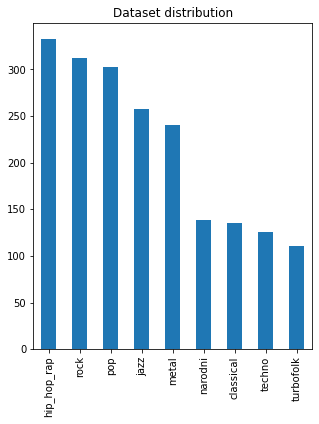

In [9]:
plt.figure(figsize=(5,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()

/content/drive/My Drive/Songs/all_songs/rock/rock_The Strokes - Reptilia (Official Music Video).mp3
/content/drive/My Drive/Songs/all_songs/jazz/jazz_Benny Goodman   #Don't Be That Way#.mp3
/content/drive/My Drive/Songs/all_songs/techno/Limelight NYC- House Of God (Mello & Lisi Mix).mp3
/content/drive/My Drive/Songs/all_songs/hip_hop_rap/Dustystaytrue - Never Change (Official Music Video).mp3
/content/drive/My Drive/Songs/all_songs/narodni/narodni_17.mp3
/content/drive/My Drive/Songs/all_songs/turbofolk/Родољуб Вуловић-Капетан Лазић (Капетан Љути).mp3
/content/drive/My Drive/Songs/all_songs/metal/Creeping Death-Metallica.mp3
/content/drive/My Drive/Songs/all_songs/pop/Shawn Mendes, Camila Cabello - Señorita.mp3
/content/drive/My Drive/Songs/all_songs/classical/Lacrimosa (Requiem) - Wolfgang Amadeus Mozart (lyrics).mp3


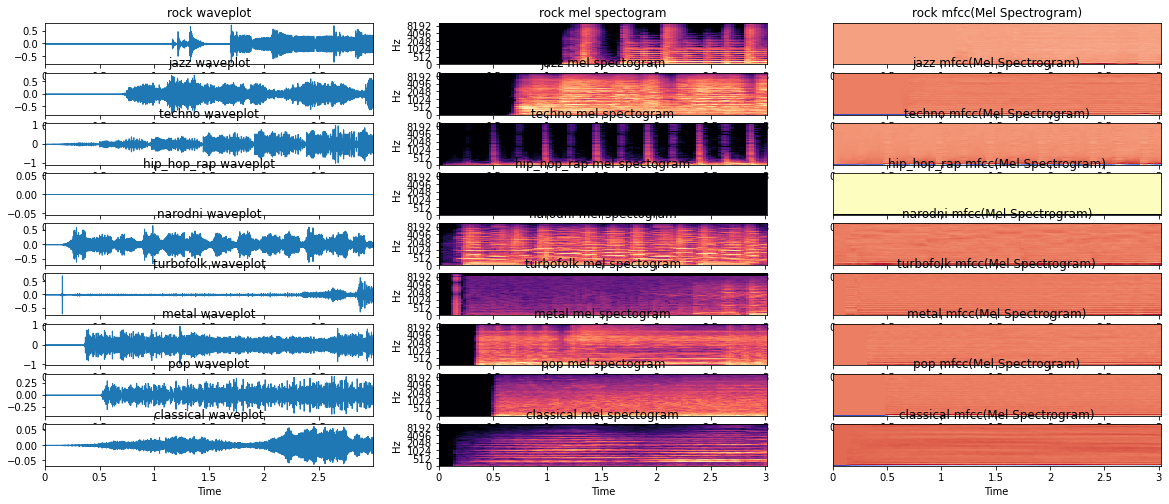

In [12]:
plt.figure(figsize=(20,10))
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[33], duration=3)
    print(dataset[dataset.label==label].filename.iloc[33])
    
    # Wave plot
    idx+=1
    plt.subplot(11, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(11, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(11, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

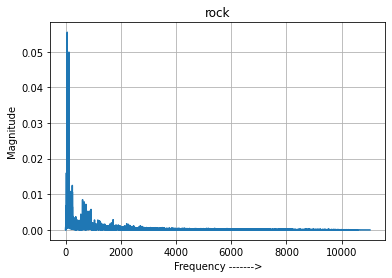

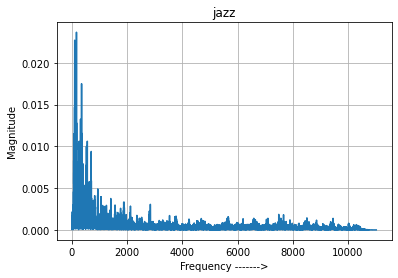

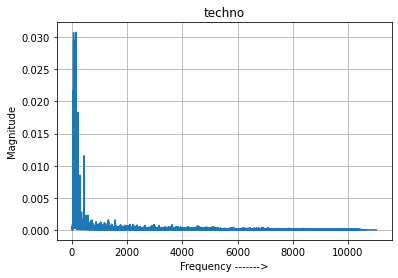

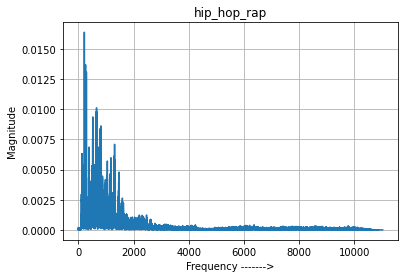

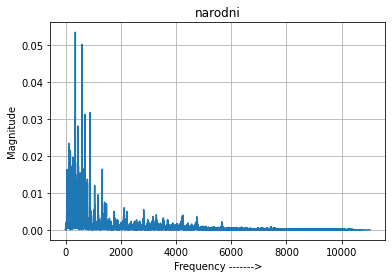

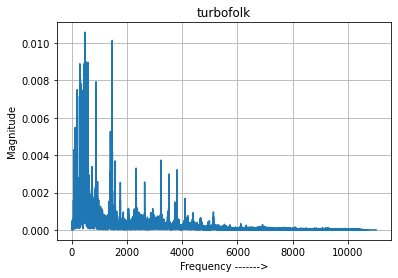

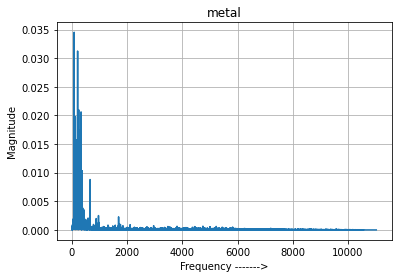

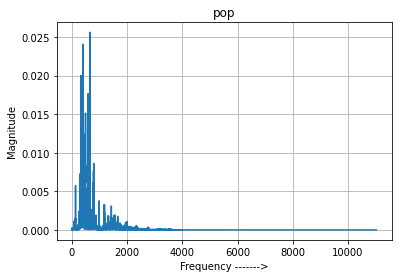

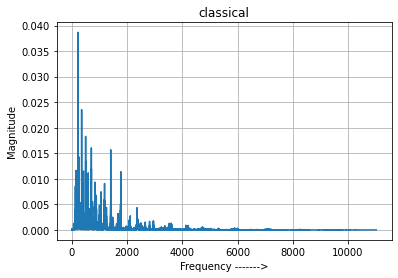

In [13]:
for label in dataset.label.unique():
   # plt.subplot(11, 3, idx)    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[15], duration=3)
    fft_plot(y,sr,label)

In [20]:
nuli = []
for i in range(649,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=3)
  if y.any() == 0:
    nuli.append(i)

In [36]:
dataset = dataset.drop(index=nuli)

In [37]:
len(dataset)

1905

In [62]:
train, test = train_test_split(dataset, test_size=0.25, random_state=42)

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 1428
Test: 477


In [64]:
x_train = []
x_test = []

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))
    
for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)



 60%|██████    | 857/1428 [15:59<10:56,  1.15s/it]

KeyboardInterrupt: ignored

In [ ]:
for idx in tqdm(range(1309,len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

In [ ]:
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

#Compile
adam = keras.optimizers.Adam(learning_rate=0.0009)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

X train: (1102, 40, 194, 1)
Y train: (1102, 9)
X test: (368, 40, 194, 1)
Y test: (368, 9)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 39, 193, 16)       80        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 19, 96, 16)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 19, 96, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 18, 95, 32)        2080      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 9, 47, 32)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 9, 47, 32)         0         
______________________________

In [ ]:
%%time
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=200,
              validation_data=(x_test, y_test),
              class_weight=class_weights,
              shuffle=True)



Train on 1102 samples, validate on 368 samples
Epoch 1/200
1102/1102 [==============================] - 8s 7ms/step - loss: 7.7251 - accuracy: 0.1615 - val_loss: 2.6697 - val_accuracy: 0.1984
Epoch 2/200
1102/1102 [==============================] - 5s 5ms/step - loss: 3.4644 - accuracy: 0.1851 - val_loss: 2.1681 - val_accuracy: 0.1739
Epoch 3/200
1102/1102 [==============================] - 5s 5ms/step - loss: 2.3716 - accuracy: 0.2250 - val_loss: 2.0588 - val_accuracy: 0.2364
Epoch 4/200
1102/1102 [==============================] - 5s 5ms/step - loss: 2.0125 - accuracy: 0.2532 - val_loss: 2.0079 - val_accuracy: 0.2853
Epoch 5/200
1102/1102 [==============================] - 5s 5ms/step - loss: 1.8872 - accuracy: 0.2868 - val_loss: 1.9793 - val_accuracy: 0.2554
Epoch 6/200
1102/1102 [==============================] - 5s 5ms/step - loss: 1.8023 - accuracy: 0.3067 - val_loss: 1.9529 - val_accuracy: 0.3098
Epoch 7/200
1102/1102 [==============================] - 5s 5ms/step - loss: 1.7389

Epoch 57/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.8043 - accuracy: 0.7151 - val_loss: 1.0761 - val_accuracy: 0.5842
Epoch 58/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.8068 - accuracy: 0.7060 - val_loss: 1.0587 - val_accuracy: 0.6087
Epoch 59/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.7723 - accuracy: 0.7250 - val_loss: 1.1338 - val_accuracy: 0.5978
Epoch 60/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.7814 - accuracy: 0.7196 - val_loss: 1.0060 - val_accuracy: 0.6413
Epoch 61/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.7783 - accuracy: 0.7132 - val_loss: 1.0410 - val_accuracy: 0.6114
Epoch 62/200
1102/1102 [==============================] - 5s 5ms/step - loss: 0.7368 - accuracy: 0.7178 - val_loss: 0.9878 - val_accuracy: 0.6495
Epoch 63/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.7850 - accuracy: 0.7132 - val_loss: 0.9736 -

1102/1102 [==============================] - 6s 5ms/step - loss: 0.4957 - accuracy: 0.8167 - val_loss: 0.8411 - val_accuracy: 0.7038
Epoch 114/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.4862 - accuracy: 0.8230 - val_loss: 0.8206 - val_accuracy: 0.7065
Epoch 115/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.4876 - accuracy: 0.8348 - val_loss: 0.8450 - val_accuracy: 0.6821
Epoch 116/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.4788 - accuracy: 0.8339 - val_loss: 0.8386 - val_accuracy: 0.6875
Epoch 117/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.5049 - accuracy: 0.8149 - val_loss: 0.8785 - val_accuracy: 0.6793
Epoch 118/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.4588 - accuracy: 0.8330 - val_loss: 0.8086 - val_accuracy: 0.7065
Epoch 119/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.4892 - accuracy: 0.8258 - val_loss: 0.8411 - val_ac

Epoch 169/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.3174 - accuracy: 0.8784 - val_loss: 0.7123 - val_accuracy: 0.7201
Epoch 170/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.2954 - accuracy: 0.8893 - val_loss: 0.6844 - val_accuracy: 0.7391
Epoch 171/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.2838 - accuracy: 0.8929 - val_loss: 0.7473 - val_accuracy: 0.7310
Epoch 172/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.3078 - accuracy: 0.8848 - val_loss: 0.7766 - val_accuracy: 0.7255
Epoch 173/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.3413 - accuracy: 0.8748 - val_loss: 0.7401 - val_accuracy: 0.7391
Epoch 174/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.3000 - accuracy: 0.8875 - val_loss: 0.7078 - val_accuracy: 0.7391
Epoch 175/200
1102/1102 [==============================] - 6s 5ms/step - loss: 0.2893 - accuracy: 0.8956 - val_loss: 0

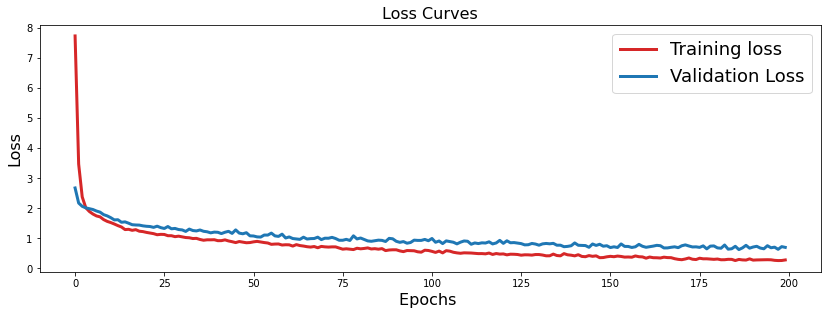

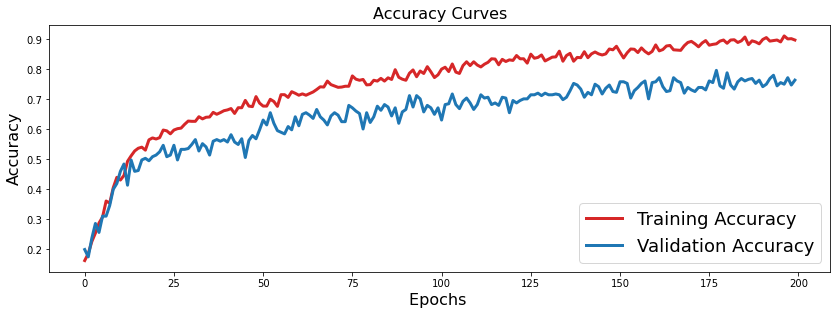

In [ ]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

model_name = "genre_classifier(test_98%).h5"
model.save(model_name)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

368/368 [==============================] - 1s 2ms/step
Test loss: 0.6935784738996754
Test accuracy: 0.7635869383811951


In [ ]:
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

368/368 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

   classical       0.91      0.75      0.82        28
 hip-hop-rap       0.75      0.94      0.84        52
        jazz       0.83      0.74      0.78        39
       metal       0.97      0.72      0.83        40
     narodni       0.94      0.72      0.82        40
         pop       0.71      0.65      0.68        62
        rock       0.72      0.76      0.74        50
      techno       0.68      0.72      0.70        36
   turbofolk       0.54      0.95      0.69        21

    accuracy                           0.76       368
   macro avg       0.78      0.77      0.77       368
weighted avg       0.79      0.76      0.77       368



# Classify new song

In [ ]:
from keras.models import load_model
 

#model = load_model("genre_classifier(test_98%).h5")

#File to be classified
classify_file = "D:/Songs/rock/rock_Nickelback - Photograph.mp3"
x_test = []
x_test.append(extract_features(classify_file,0.5))
x_test = np.asarray(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

pred = model.predict(x_test,verbose=1)

print(pred)
pred_class = model.predict_classes(x_test)

print(pred_class[0])
if pred_class[0]==0:
    print("jazz")
    print("confidence of prediction:",pred[0][0])
elif (pred_class[0]==1):
    print("narodni")
    print("confidence of prediction:",pred[0][1])
else:
    print("rock")
    print("confidence of prediction:",pred[0][2])

print('jazz %: ', pred[0][0], ' narodni %:' ,pred[0][1],'rock', pred[0][2])


1/1 [==============================] - 0s 42ms/step
[[0.00644802 0.00205055 0.99150145]]
2
rock
confidence of prediction: 0.99150145
jazz %:  0.006448015  narodni %: 0.0020505511 rock 0.99150145


# **Unsupervised Learning -> K-means**

In [93]:
data_cluster = x_train + x_test
print(len(data_cluster))

1903


In [123]:
clean_data = []
for row in data_cluster:
  ff = np.average(row,axis=1)
  clean_data.append(ff)

In [102]:
data_cluster[0].shape

(56, 194)

In [81]:
columns=[]
for i in range(1,41):
  columns.append('mfcc'+str(i))
columns.append('spec_cent')
columns.append('spec_bw')
columns.append('rolloff')
columns.append('zcr')
for i in range(1,13):
  columns.append('chroma_stft'+str(i))
print(columns)

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft8', 'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12']


In [124]:
data_cluster = pd.DataFrame(clean_data,columns=columns)

In [126]:
data_cluster.head(3)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,spec_cent,spec_bw,rolloff,zcr,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12
0,-96.905903,105.420078,9.196734,20.461042,1.093264,-2.233801,15.504523,8.376716,-11.213575,11.617719,-9.003781,11.843130,-7.230007,-0.362574,0.346030,2.659777,-11.919343,-3.071745,-9.030289,1.442489,-2.218373,0.769538,2.428854,5.087428,-5.616440,4.021692,-7.568105,-0.788861,-0.248464,7.586385,0.411168,1.662515,-5.546914,-1.549652,-7.237640,-1.982090,-6.318865,-2.202368,-4.644432,-3.534993,2182.821468,2417.352758,4591.178595,0.088525,0.317324,0.444856,0.518002,0.319272,0.292050,0.224036,0.218873,0.152313,0.246320,0.479434,0.355520,0.425250
1,-45.525309,67.297826,-4.854013,50.224782,9.191722,10.447534,9.280453,13.644444,3.946446,12.042922,-1.673526,7.017927,-13.596566,-3.940305,-4.712344,3.028676,-3.109955,4.156270,1.173886,2.578910,-3.357594,6.954644,0.057073,0.320886,-7.641261,-2.025565,-1.162450,4.768170,-1.192298,2.095094,-1.816922,4.985875,-1.540052,5.079547,-3.040454,-2.770352,-6.998377,1.000392,-2.195579,5.355786,2744.353402,2614.304222,5578.542556,0.128634,0.492536,0.431542,0.579623,0.655160,0.882683,0.758330,0.540644,0.499461,0.545846,0.394540,0.388782,0.628540
2,-66.495270,132.353438,-2.471043,18.004029,-9.629349,8.661350,-8.233339,3.745808,-9.435837,4.901628,4.087920,7.022385,-7.190517,-0.802367,-3.785671,1.584085,-13.907062,-3.353776,-7.876321,-7.349519,-8.730346,0.411201,-8.537510,-0.508230,-4.386935,3.967444,-1.999989,-2.571531,-4.100672,3.347952,-1.754208,-2.627228,-9.261553,-7.989572,-8.408689,2.034311,-1.577178,-1.891416,-5.293878,0.398605,1498.261027,1990.967309,3131.749104,0.045647,0.468693,0.634708,0.330802,0.223080,0.333831,0.565494,0.432243,0.355090,0.337835,0.300784,0.384721,0.370521


In [92]:
data_cluster.shape

(1903, 1)

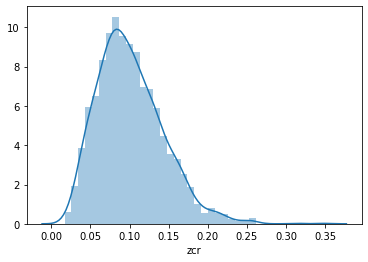

In [142]:
import seaborn as sns

plt2 = sns.distplot(data_cluster['zcr'])

In [143]:
from sklearn import preprocessing
# Get column names first
names = data_cluster.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(data_cluster)
scaled_data = pd.DataFrame(scaled_data, columns=names)

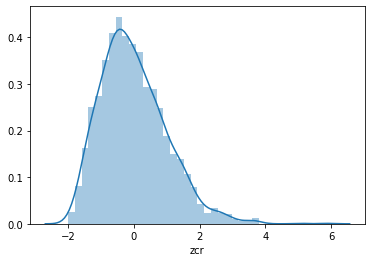

In [144]:
plt2 = sns.distplot(scaled_data['zcr'])

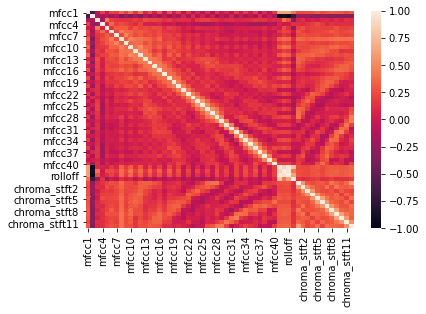

In [152]:
corrMatrix = scaled_data.corr()
sns.heatmap(corrMatrix, annot=False,vmin=-1,vmax=1)
plt.show()

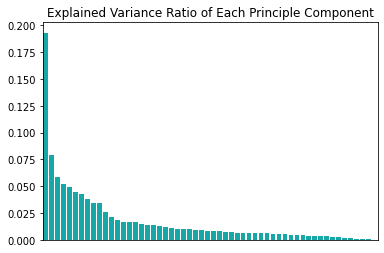

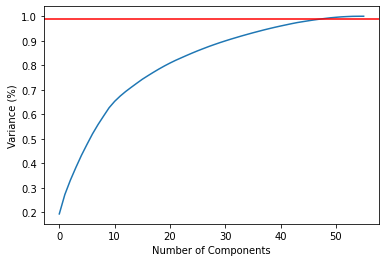

In [168]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(scaled_data)
data_new = pca.transform(scaled_data)
plt.figure()
sns.barplot(x=np.arange(scaled_data.shape[1]),y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.99, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()


In [169]:
pca56 = PCA(n_components=56)
pca56.fit(scaled_data)
scaled_data = pca56.transform(scaled_data)

In [187]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

estimator = KMeans(init='k-means++', n_clusters=9, random_state=42, n_init=100, max_iter=3000)
y_pred = estimator.fit_predict(scaled_data) 

In [188]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(scaled_data)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1903 samples in 0.016s...
[t-SNE] Computed neighbors for 1903 samples in 0.529s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1903
[t-SNE] Computed conditional probabilities for sample 1903 / 1903
[t-SNE] Mean sigma: 2.752806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.440659
[t-SNE] KL divergence after 1500 iterations: 1.304912


In [190]:
labels_tsne_scale = y_pred
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

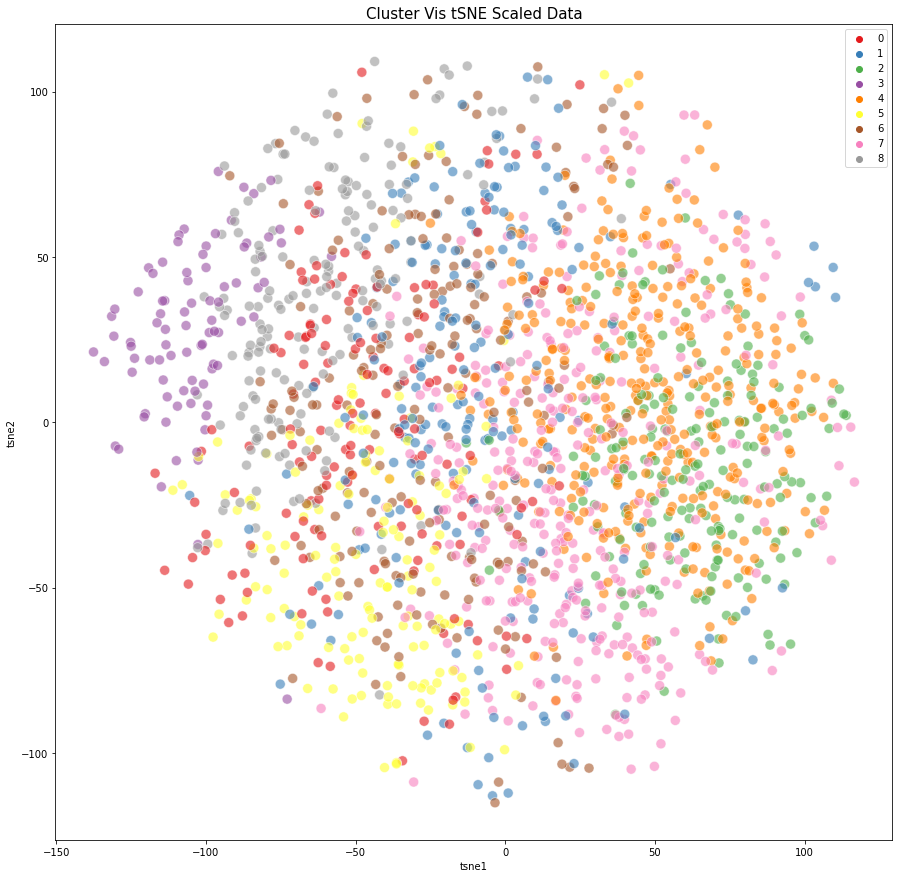

In [194]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

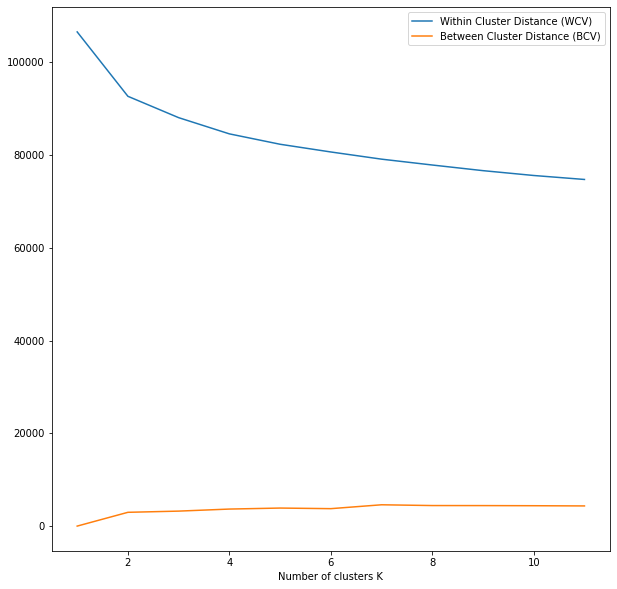

In [196]:
from scipy.spatial import distance

fig1 = plt.figure(figsize=(10, 10))
wcv = {}
bcv = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(scaled_data)
    wcv[k] = kmeans.inertia_ 
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j])**2
    if(k==1):
        bcv[1] = 0
    else:
        bcv[k] = BCV/(k*(k-1))*100
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()